In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.patches as mpatches


In [34]:
df = pd.read_csv('source/FReDA4.csv')

In [35]:
couple_ticks = ["Satisfied", "Deprived: Both partners", "Deprived: One partner",
                "Saturated: Both partners", "Saturated: One partner", "Mixed"]

couple_order = ["Couple Agreement", "Couple Deprivation", "One-sided Deprivation",
                "Couple Saturation", "One-sided Saturation", "Couple Disagreement"]

order = ["Couple Deprivation", "One-sided Deprivation", "Couple Saturation",
         "One-sided Saturation", "Couple Disagreement"]

short_palette = [
    "#c1809e", "#d7adc0",
    "#26a59a", "#73c5bd",
    "#355C9C"
]
yes_no_palette = ["#F4A582", "#A59DFF"]

# palette = [
# "#D18CA6",             # Group 1
#     "#66C1BC", "#4DB6AC", "#00897B", "#00695C",  # Group 2
#     "#9FA8DA", "#7986CB", "#5C6BC0", "#3949AB"
# ]

new_palette = [
    # "#C4A000",
    # "#4DB6AC", "#00897B", "#00695C",  # Group 2
    # "#7986CB", "#5C6BC0", "#3949AB",  # Group 3
    # "#D18CA6", "#B76A8D",  # Group 1
    # "#c1809e", "#d7adc0", "#e9d2dd",
    # "#26a59a", "#73c5bd", "#b3dfdb",
    # "#5374ab", "#90a5c8"
    "#b96f91", "#d7adc0", "#d7adc0",
    "#0a9a8c", "#73c5bd", "#73c5bd",
    "#3d629f", "#3d629f"
]



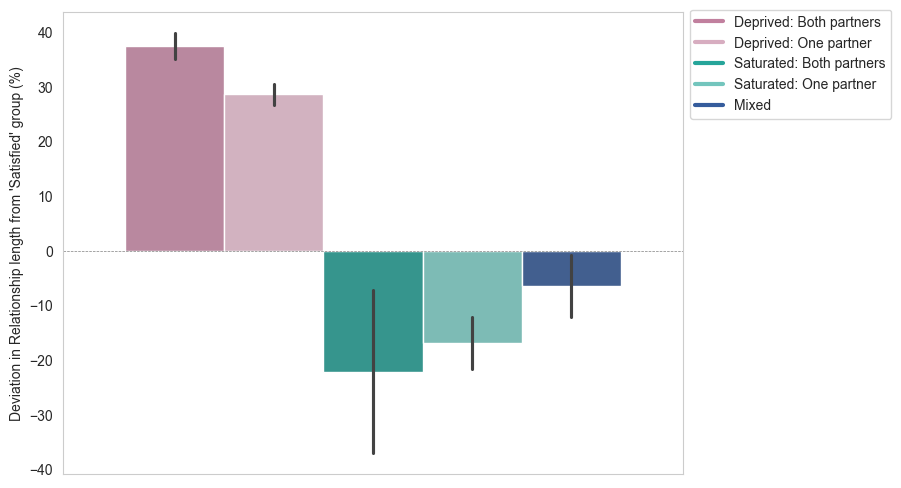

In [36]:
traits = [
    "Relationship Length",
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

mean_baseline = (
    df_couple
    .loc[df_couple["Group2"] == "Couple Agreement", "Score"]
    .mean()
)

df_plot = (
    df_couple
    .assign(
        Deviation=lambda x: x["Score"] - mean_baseline,
        Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
    )
    .query("Group2 != 'Couple Agreement'")
    .assign(Group2=lambda x: pd.Categorical(x["Group2"], categories=order, ordered=True))
)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_plot,
    x="Trait",
    y="Deviation_pct",
    hue="Group2",
    errorbar="se",
    palette=short_palette
)
plt.ylabel("")
plt.xlabel("")

handles = [
    plt.Line2D([0], [0], color=short_palette[i], lw=3, label=couple_ticks[1:][i])
    for i in range(len(couple_ticks[1:]))
]

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.0, 1.02), labels=couple_ticks[1:])
plt.ylabel("Deviation in Relationship length from 'Satisfied' group (%)")
plt.xticks([])

ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
plt.grid(False)

plt.savefig(f'output/img_bg/alles/{traits[0]}2.png', dpi=600, transparent=False, bbox_inches='tight')

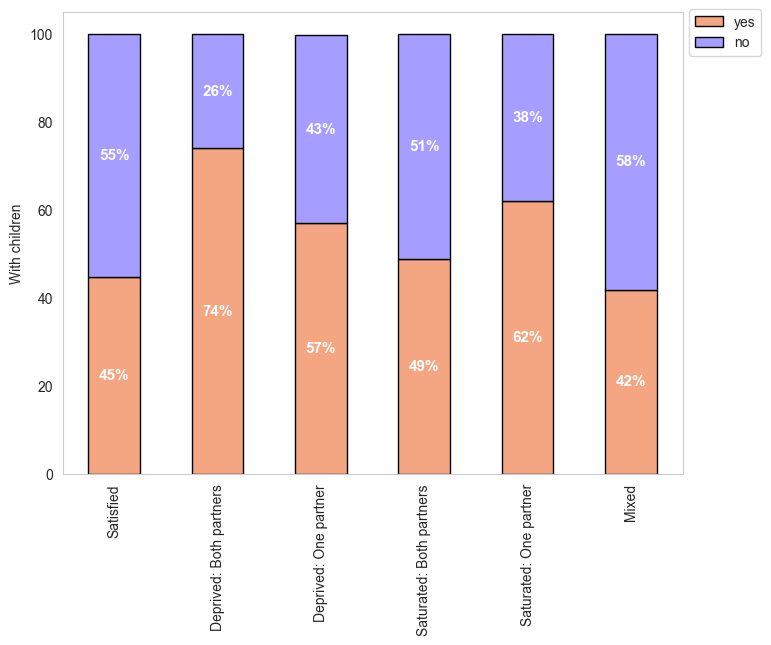

In [37]:
order = ["Couple Agreement", "Couple Deprivation", "One-sided Deprivation",
         "Couple Saturation", "One-sided Saturation", "Couple Disagreement"]

target = 2

traits = [
    "Married",
    "Cohabitation",
    "Kids"
]
name = ["Married", "Cohabiting", "With children"]

t = traits[target].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits[target],
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)
    .agg(
        yes=("Score", lambda s: 100 * (s > 0).mean()),
        no=("Score", lambda s: 100 * (s < 1).mean()),
        # total=("Score", lambda s: 100),
    )
    .reset_index()
)
df_couple_summ['Group2'] = pd.Categorical(df_couple_summ['Group2'], order)
df_couple_summ.sort_values("Group2")

ax = df_couple_summ.plot(
    kind='bar',
    stacked=True,
    color=yes_no_palette,
    figsize=(8, 6),
    edgecolor='black',
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center',
                 color='white', fontsize=11, fontweight='bold')

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))

# plt.ylabel("")
# plt.xlabel("")
plt.grid(False)
plt.xticks([0, 1, 2, 3, 4, 5], labels=couple_ticks, rotation=90)
y = plt.ylabel(f"{name[target]}")
# plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')

In [50]:
trait = [
    # "Age",
    # "Sex",
    # "Work Status",
    # "Neuroticism",
    # "Extraversion",
    # "Openness",
    # "Agreeableness",
    # "Conscientiousness",
    # "Depressiveness",
    # "Loneliness",
    # "Self-esteem",
    # "Life Satisfaction",
    # "Health",
    # "Communication Quality",
    # "Relationship Satisfaction",
    "Conflict Management",
]

df_couple = df.melt(
    id_vars=["Group1"],
    value_vars=trait,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group1"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)

# mean_baseline = (
#     df_couple
#     .loc[df_couple["Group1"] == "SubGroup1", "Score"]
#     .mean()
# )
#
# df_plot = (
#     df_couple
#     .assign(
#         Deviation=lambda x: x["Score"] - mean_baseline,
#         Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
#     )
#     .query("Group1 != 'SubGroup1'")
# )

# # group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
# #                "SubGroup8", "SubGroup5", "SubGroup6",
# #                "SubGroup4", "SubGroup9"]
# group_order = [
#     "SubGroup3", "SubGroup2", "SubGroup7",
#     "SubGroup6", "SubGroup5", "SubGroup8",
#     "SubGroup4", "SubGroup9"
# ]
#
# colors = sns.color_palette('Set3', 8)
# plt.figure(figsize=(8, 6))
#
# # group_labels = [
# #     'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
# #     'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
# #     'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
# # ]
# group_labels = [
#     'Deprived: Both', 'Deprived: Me', 'Deprived: Partner',
#     'Saturated: Both', 'Saturated: Me', 'Saturated: Partner',
#     'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
# ]
# hatches = ["///", "\\\\"]
#
# ax = sns.barplot(
#     data=df_plot,
#     x="Trait",
#     y="Deviation_pct",
#     hue="Group1",
#     hue_order=group_order,  # alphabetical
#     errorbar="se",
#     palette=new_palette,
#     # width=0.6
# )
# means = (
#     df_plot.groupby("Group1", observed=True)["Deviation_pct"]
#     .mean()
#     .round(2)
# )
#
# handles = [
#     plt.Line2D([0], [0], color=new_palette[i], lw=3, label=group_labels[i])
#     for i in range(len(group_labels))
# ]
# plt.legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))
#
# target_indices1 = [1, 4]
# target_indices2 = [2, 5]
#
# for i, patch in enumerate(ax.patches):
#     if i in target_indices1:
#         patch.set_hatch("///")   # pattern for selected bars
#     elif i in target_indices2:
#         patch.set_hatch("\\\\")
#     else:
#         patch.set_hatch("")
#
# plt.xlabel("")
# plt.ylabel("")
# plt.xticks([])
# y = plt.ylabel(f"Deviation in {trait} from Satisfied group (%)")
#
# ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
# plt.grid(False)

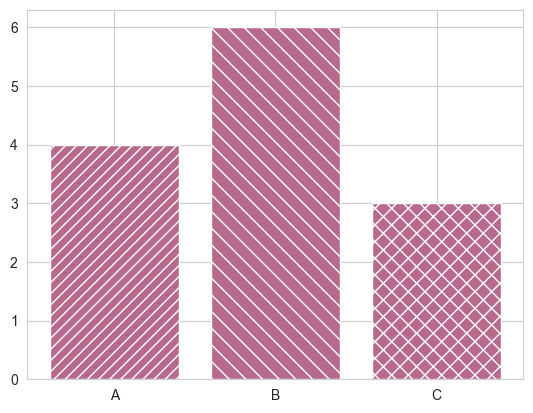

In [25]:
import matplotlib.pyplot as plt

values = [4, 6, 3]
labels = ["A", "B", "C"]
hatches = ["///", "\\\\", "xx"]

fig, ax = plt.subplots()

bars = ax.bar(labels, values, color="#B76A8D")

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.show()

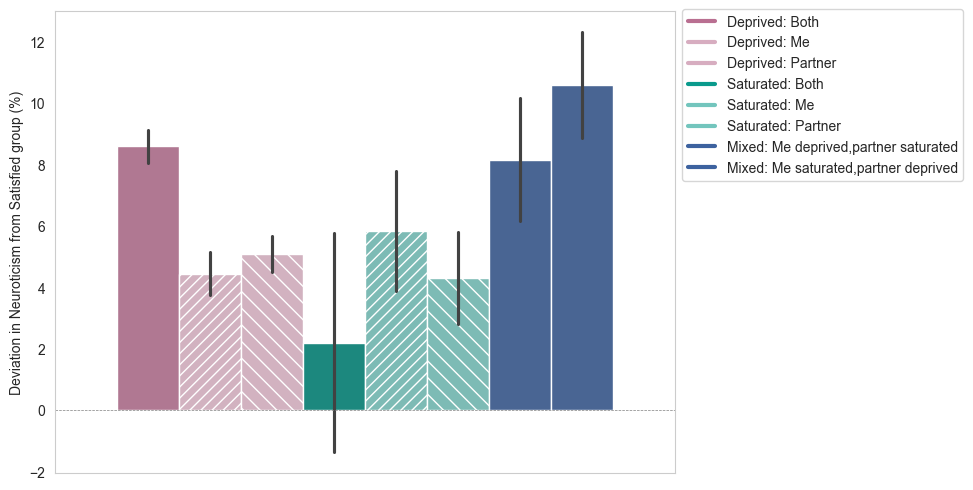

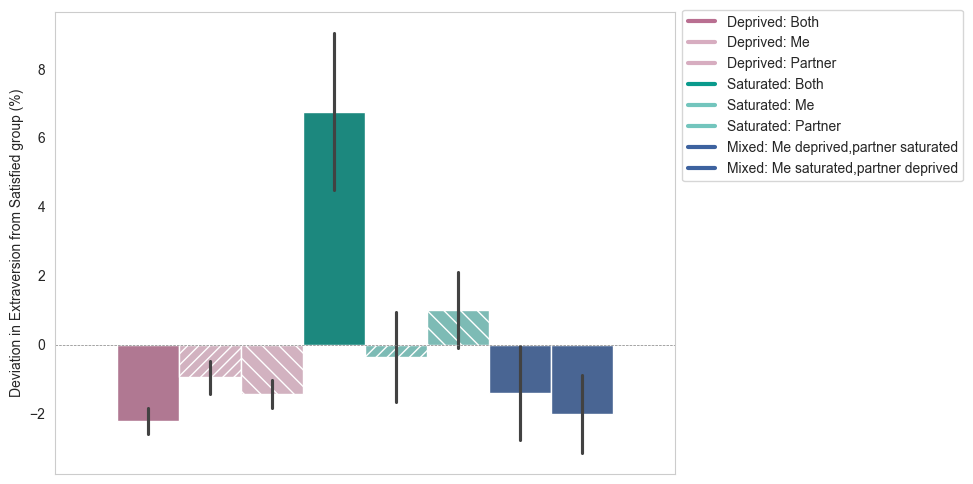

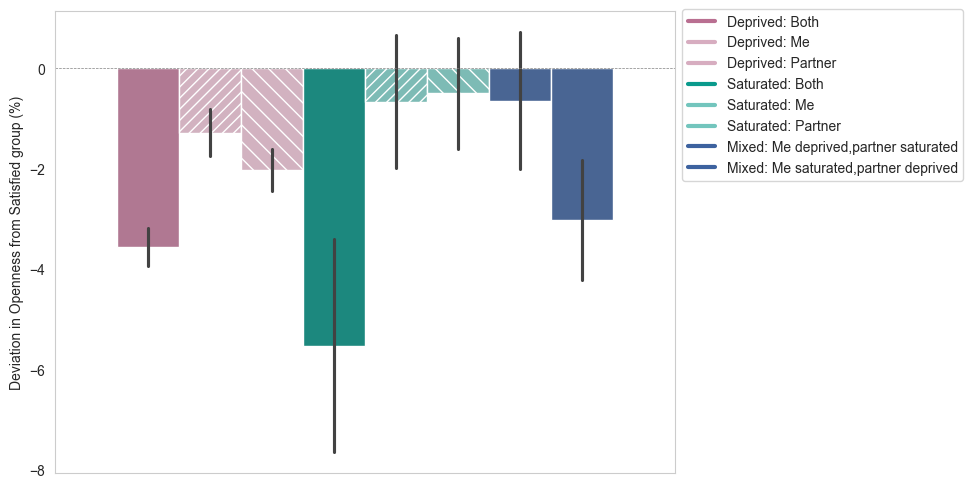

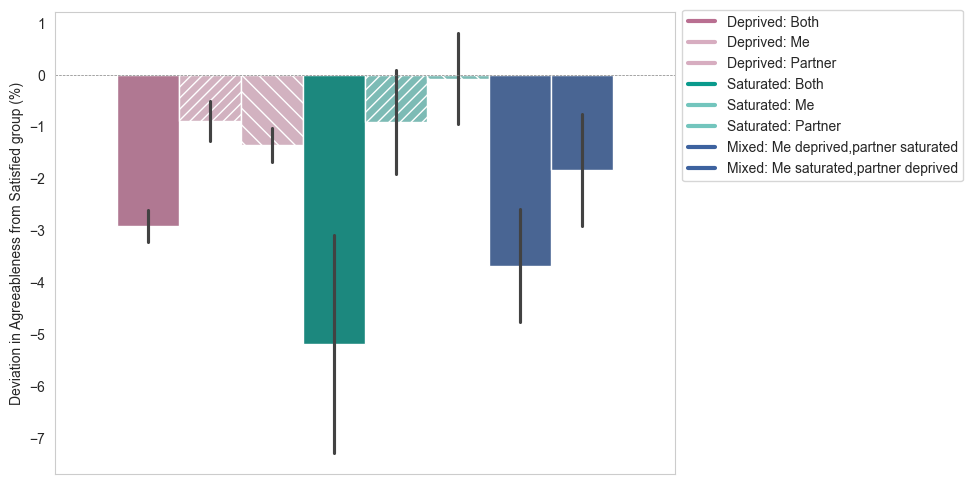

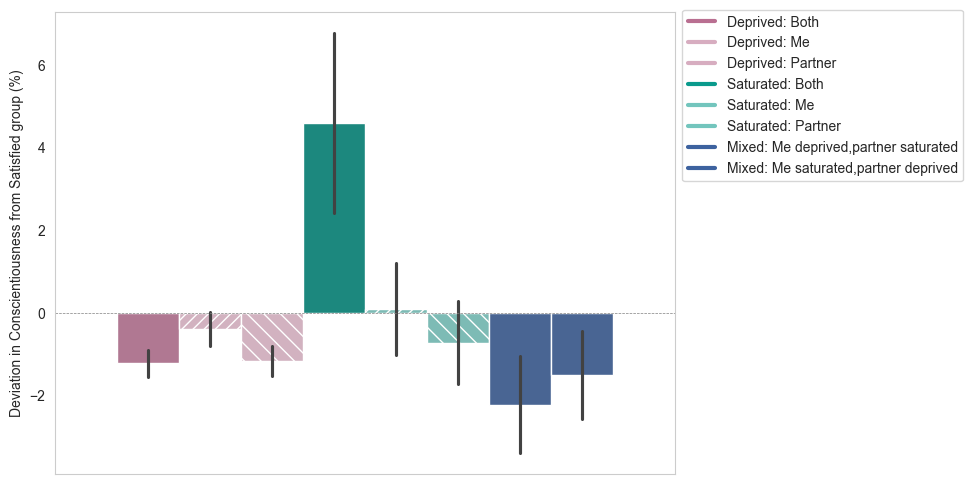

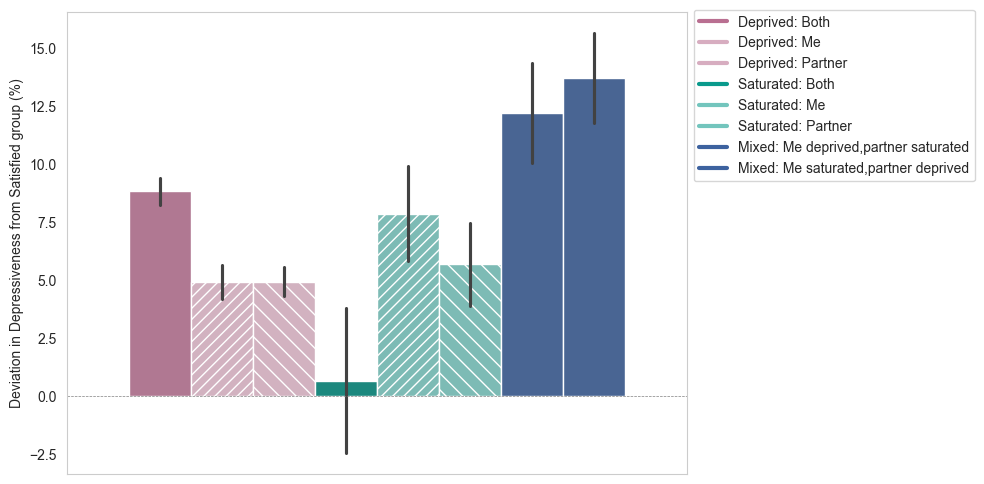

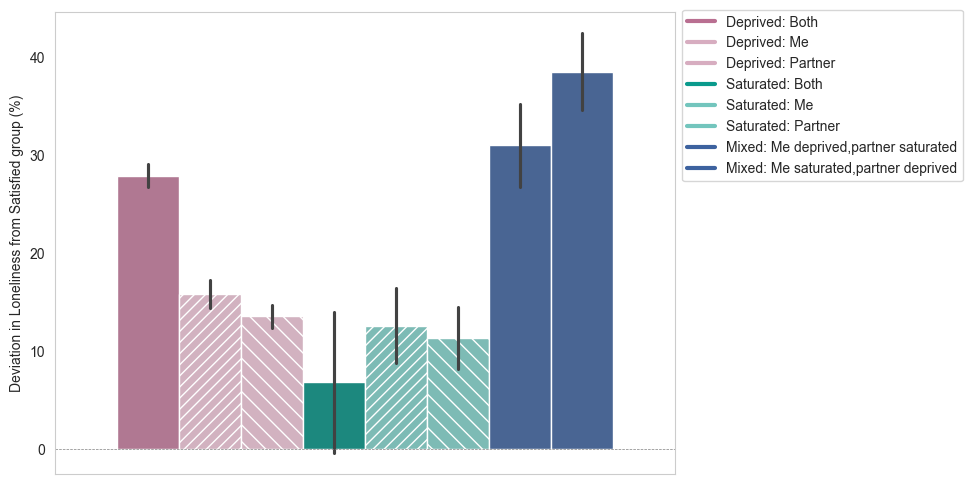

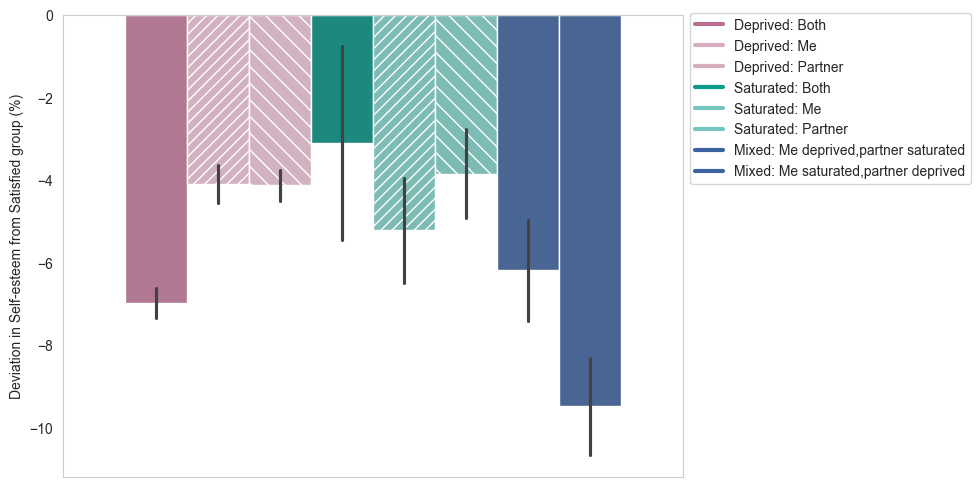

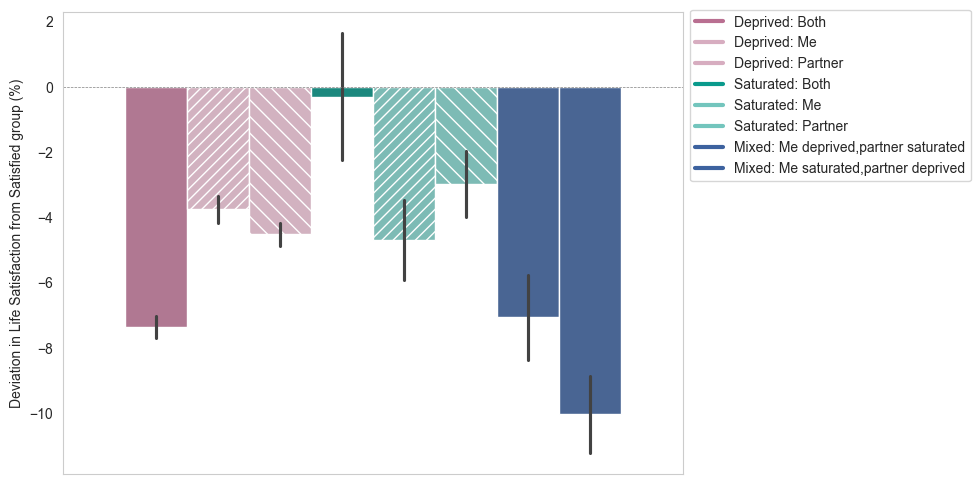

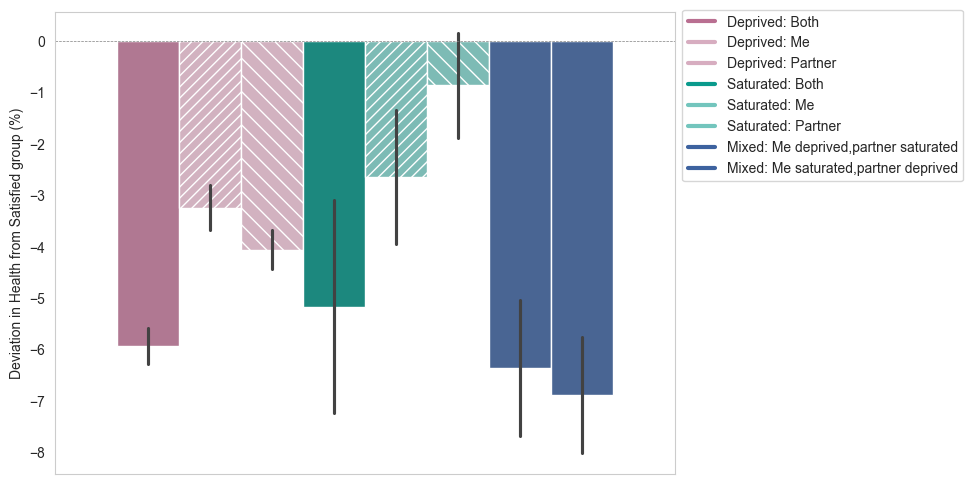

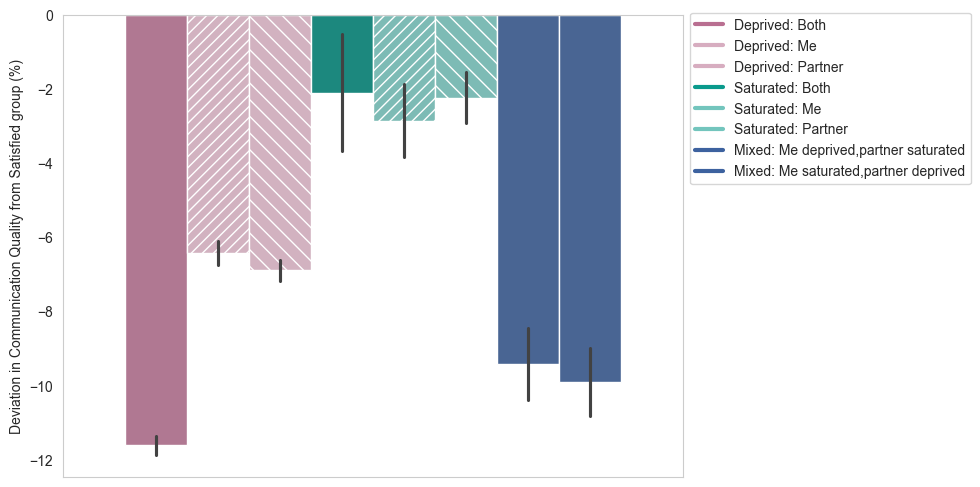

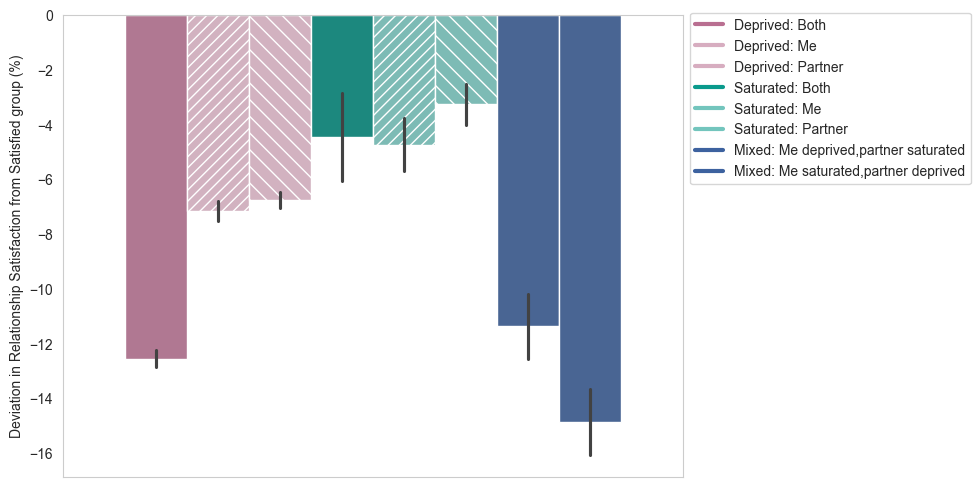

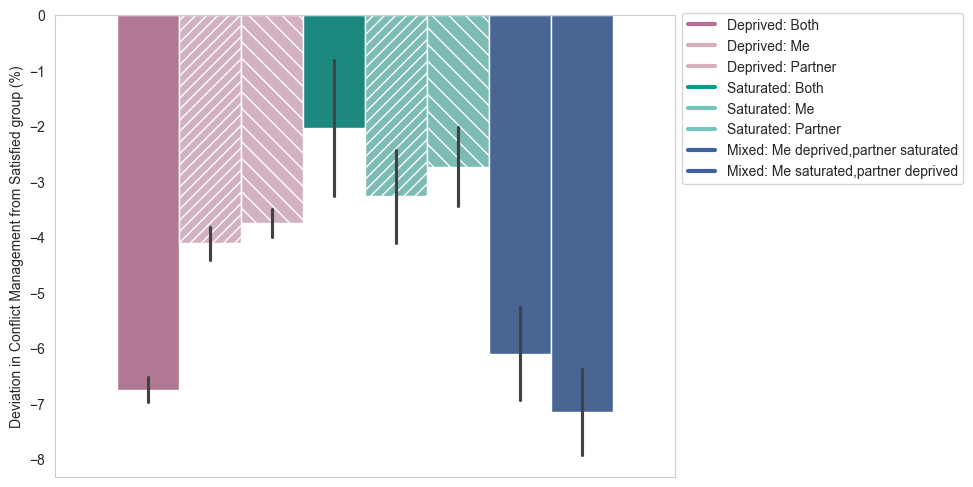

In [31]:
traits = [
    # "Age",
    # "Sex",
    # "Work Status",
    "Neuroticism",
    "Extraversion",
    "Openness",
    "Agreeableness",
    "Conscientiousness",
    "Depressiveness",
    "Loneliness",
    "Self-esteem",
    "Life Satisfaction",
    "Health",
    "Communication Quality",
    "Relationship Satisfaction",
    "Conflict Management",
]
for trait in traits:
    t = trait.split()[0]

    df_couple = df.melt(
        id_vars=["Group1"],
        value_vars=trait,
        var_name="Trait",
        value_name="Score"
    )

    df_couple_summ = (
        df_couple
        .groupby(["Trait", "Group1"], observed=True)["Score"]
        .agg(['mean', 'std', 'median'])
        .reset_index()
    )

    mean_baseline = (
        df_couple
        .loc[df_couple["Group1"] == "SubGroup1", "Score"]
        .mean()
    )

    df_plot = (
        df_couple
        .assign(
            Deviation=lambda x: x["Score"] - mean_baseline,
            Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
        )
        .query("Group1 != 'SubGroup1'")
    )
    #
    # group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
    #                "SubGroup8", "SubGroup5", "SubGroup6",
    #                "SubGroup4", "SubGroup9"]
    #
    # colors = sns.color_palette('Set3', 8)
    # plt.figure(figsize=(8, 6))
    #
    # group_labels = [
    #     'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
    #     'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
    #     'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
    # ]
    #
    # ax = sns.barplot(
    #     data=df_plot,
    #     x="Trait",
    #     y="Deviation_pct",
    #     hue="Group1",
    #     hue_order=group_order,  # alphabetical
    #     errorbar="se",
    #     palette=new_palette,
    #     # width=0.6
    # )
    # means = (
    #     df_plot.groupby("Group1", observed=True)["Deviation_pct"]
    #     .mean()
    #     .round(2)
    # )
    # #
    # # for i, (group, mean) in enumerate(means.items()):
    # #     plt.text(i, mean + 1, f"{mean:.1f}%", ha='center', va='bottom')
    #
    # handles = [
    #     plt.Line2D([0], [0], color=new_palette[i], lw=3, label=group_labels[i])
    #     for i in range(len(group_labels))
    # ]
    # plt.legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))
    #
    # plt.xlabel("")
    # plt.ylabel("")
    # plt.xticks([])
    # y = plt.ylabel(f"Deviation in {trait} from Satisfied group (%)")
    #
    # ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
    # plt.grid(False)

# group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
#                "SubGroup8", "SubGroup5", "SubGroup6",
#                "SubGroup4", "SubGroup9"]
    group_order = [
        "SubGroup3", "SubGroup2", "SubGroup7",
        "SubGroup6", "SubGroup5", "SubGroup8",
        "SubGroup4", "SubGroup9"
    ]

    colors = sns.color_palette('Set3', 8)
    plt.figure(figsize=(8, 6))

    group_labels = [
        'Deprived: Both', 'Deprived: Me', 'Deprived: Partner',
        'Saturated: Both', 'Saturated: Me', 'Saturated: Partner',
        'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
    ]
    hatches = ["///", "\\\\"]

    ax = sns.barplot(
        data=df_plot,
        x="Trait",
        y="Deviation_pct",
        hue="Group1",
        hue_order=group_order,  # alphabetical
        errorbar="se",
        palette=new_palette,
        # width=0.6
    )
    means = (
        df_plot.groupby("Group1", observed=True)["Deviation_pct"]
        .mean()
        .round(2)
    )

    handles = [
        plt.Line2D([0], [0], color=new_palette[i], lw=3, label=group_labels[i])
        for i in range(len(group_labels))
    ]
    plt.legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))

    target_indices1 = [1, 4]
    target_indices2 = [2, 5]

    for i, patch in enumerate(ax.patches):
        if i in target_indices1:
            patch.set_hatch("///")   # pattern for selected bars
        elif i in target_indices2:
            patch.set_hatch("\\\\")
        else:
            patch.set_hatch("")

    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])
    y = plt.ylabel(f"Deviation in {trait} from Satisfied group (%)")

    ax.axhline(0, color='grey', linewidth=0.5, linestyle='--')
    plt.grid(False)
    plt.savefig(f'output/img_bg/alles/{t}2.png', dpi=600, transparent=False, bbox_inches='tight')

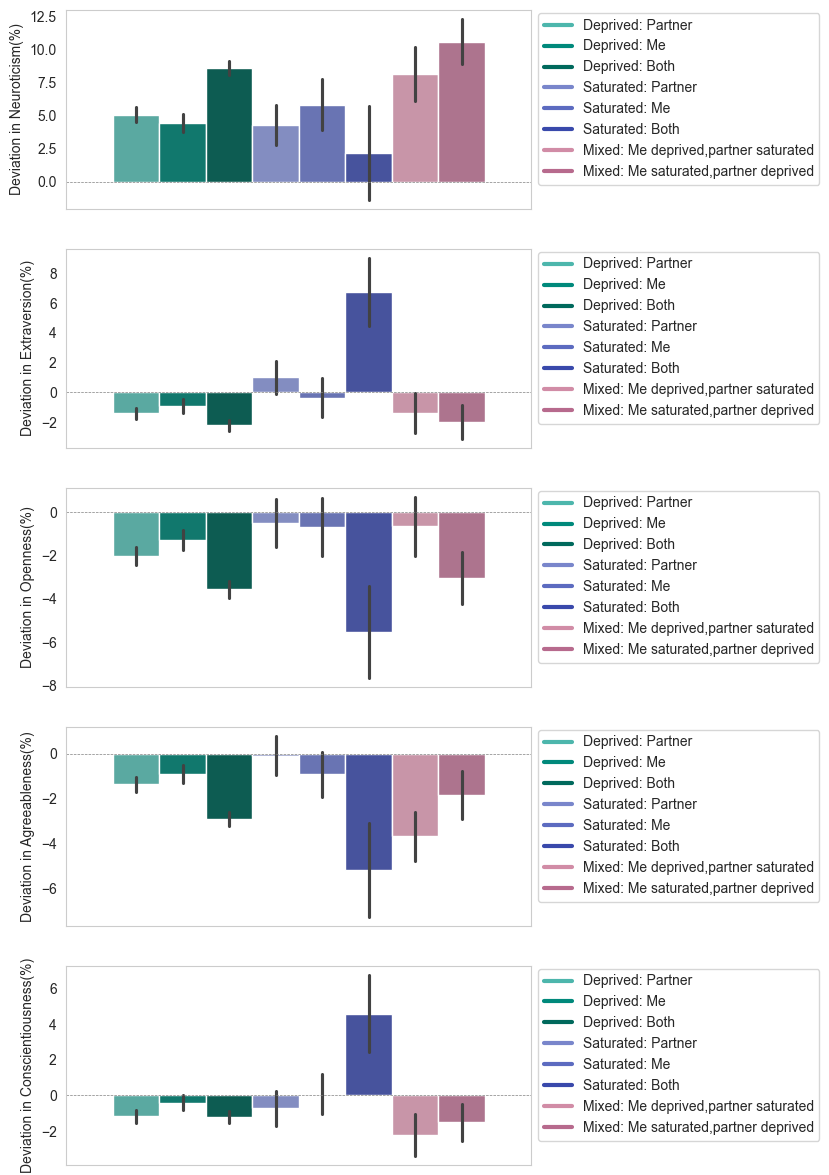

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [60]:
traits = [
    "Neuroticism",
    "Extraversion",
    "Openness",
    "Agreeableness",
    "Conscientiousness",
]

fig, axes = plt.subplots(5, 1, figsize=(6, 15))

for i, trait in enumerate(traits):
    t = trait.split()[0]

    df_couple = df.melt(
        id_vars=["Group1"],
        value_vars=trait,
        var_name="Trait",
        value_name="Score"
    )

    df_couple_summ = (
        df_couple
        .groupby(["Trait", "Group1"], observed=True)["Score"]
        .agg(['mean', 'std', 'median'])
        .reset_index()
    )

    mean_baseline = (
        df_couple
        .loc[df_couple["Group1"] == "SubGroup1", "Score"]
        .mean()
    )

    df_plot = (
        df_couple
        .assign(
            Deviation=lambda x: x["Score"] - mean_baseline,
            Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
        )
        .query("Group1 != 'SubGroup1'")
    )

    group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
                   "SubGroup8", "SubGroup5", "SubGroup6",
                   "SubGroup4", "SubGroup9"]

    colors = sns.color_palette('Set3', 8)
    plt.figure(figsize=(8, 6))

    group_labels = [
        'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
        'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
        'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
    ]

    p = sns.barplot(
        data=df_plot,
        x="Trait",
        y="Deviation_pct",
        hue="Group1",
        hue_order=group_order,  # alphabetical
        errorbar="se",
        palette=new_palette,
        ax=axes[i],

    )

    handles = [
        plt.Line2D([0], [0], color=new_palette[i], lw=3, label=group_labels[i])
        for i in range(len(group_labels))
    ]
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"Deviation in {trait}(%)")
    axes[i].set_xticks([])
    axes[i].legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))
    axes[i].grid(False)
    axes[i].axhline(0, color='grey', linewidth=0.5, linestyle='--')

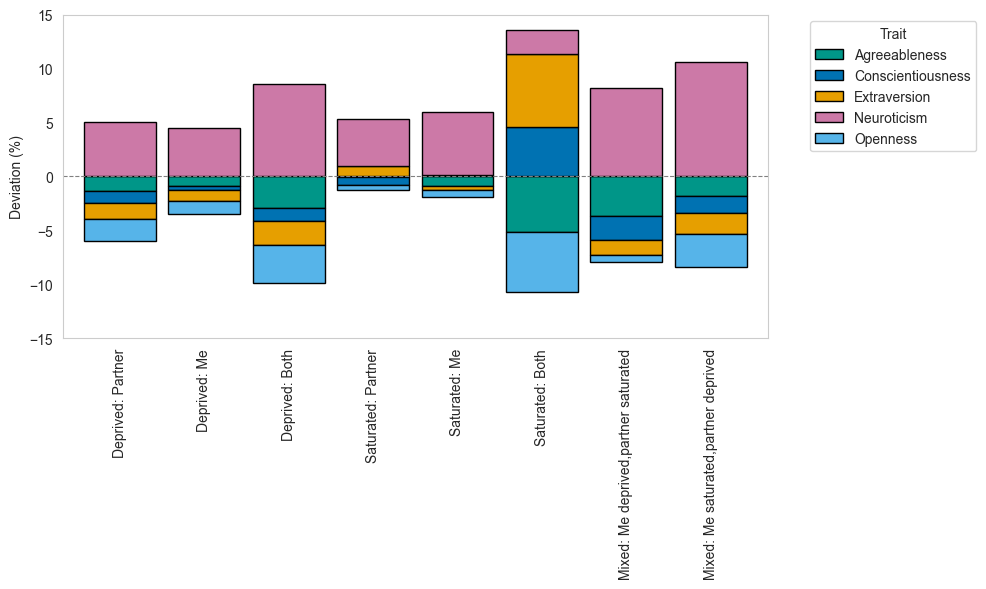

In [92]:
traits = [
    "Neuroticism",
    "Extraversion",
    "Openness",
    "Agreeableness",
    "Conscientiousness",
]

all_means = []

for trait in traits:
    df_couple = df.melt(
        id_vars=["Group1"],
        value_vars=[trait],  # <- must be a list
        var_name="Trait",
        value_name="Score"
    )
    mean_baseline = (
        df_couple.loc[df_couple["Group1"] == "SubGroup1", "Score"].mean()
    )
    df_plot = (
        df_couple
        .assign(
            Deviation=lambda x: x["Score"] - mean_baseline,
            Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
        )
        .query("Group1 != 'SubGroup1'")
    )
    means = (
        df_plot.groupby("Group1", observed=True)["Deviation_pct"]
        .mean()
        .round(2)
        .reset_index()
    )

    means["Trait"] = trait  # keep which trait it came from
    all_means.append(means)

df_means_all = pd.concat(all_means, ignore_index=True)

df_stacked = df_means_all.pivot(index="Group1", columns="Trait", values="Deviation_pct")
group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
               "SubGroup8", "SubGroup5", "SubGroup6",
               "SubGroup4", "SubGroup9"]

group_labels = [
    'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
    'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
    'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
]

df_stacked = df_stacked.loc[group_order]
df_stacked.index = group_labels

colors = [
    "#009688",
    "#0072B2",
    "#E69F00",
    "#CC79A7",
    "#56B4E9"
]

ax = df_stacked.plot(
    kind="bar",
    stacked=True,
    color=colors,
    figsize=(10, 6),
    edgecolor="black",
    width=0.85
)

ax.axhline(0, color="grey", linestyle="--", linewidth=0.8)
ax.set_ylabel("Deviation (%)")
ax.set_xlabel("")

ax.legend(title="Trait", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(-15, 15)
plt.tight_layout()
plt.grid(False)
plt.savefig(f'output/img_bg/alles/Personality_stacked.png', dpi=600, transparent=False, bbox_inches='tight')

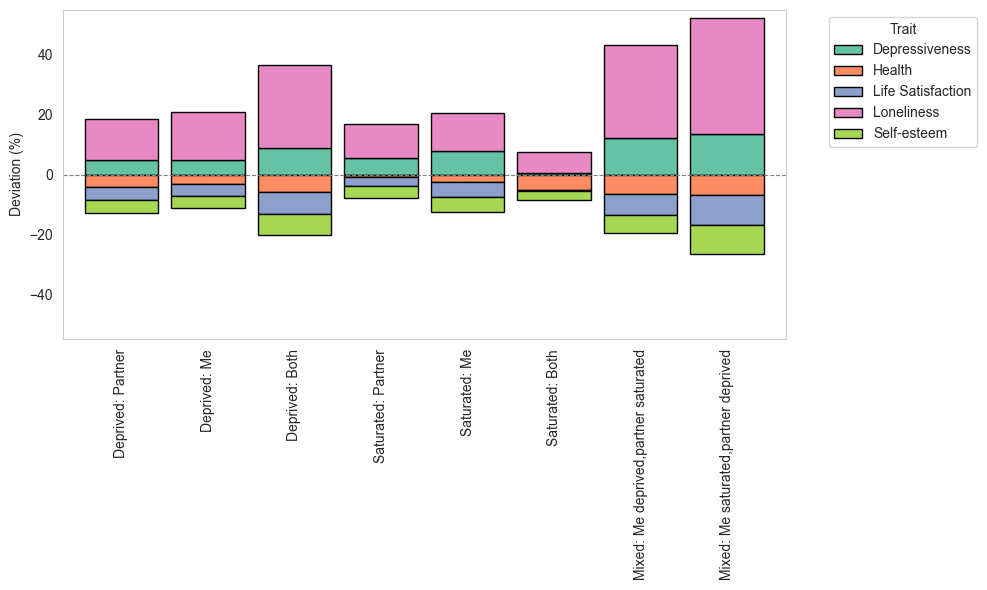

In [93]:
traits = [
    "Depressiveness",
    "Loneliness",
    "Self-esteem",
    "Life Satisfaction",
    "Health",
]

all_means = []

for trait in traits:
    df_couple = df.melt(
        id_vars=["Group1"],
        value_vars=[trait],  # <- must be a list
        var_name="Trait",
        value_name="Score"
    )
    mean_baseline = (
        df_couple.loc[df_couple["Group1"] == "SubGroup1", "Score"].mean()
    )
    df_plot = (
        df_couple
        .assign(
            Deviation=lambda x: x["Score"] - mean_baseline,
            Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
        )
        .query("Group1 != 'SubGroup1'")
    )
    means = (
        df_plot.groupby("Group1", observed=True)["Deviation_pct"]
        .mean()
        .round(2)
        .reset_index()
    )

    means["Trait"] = trait  # keep which trait it came from
    all_means.append(means)

df_means_all = pd.concat(all_means, ignore_index=True)

df_stacked = df_means_all.pivot(index="Group1", columns="Trait", values="Deviation_pct")
group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
               "SubGroup8", "SubGroup5", "SubGroup6",
               "SubGroup4", "SubGroup9"]

group_labels = [
    'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
    'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
    'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
]

df_stacked = df_stacked.loc[group_order]
df_stacked.index = group_labels

colors = sns.color_palette("Set2", len(traits))

ax = df_stacked.plot(
    kind="bar",
    stacked=True,
    color=colors,
    figsize=(10, 6),
    edgecolor="black",
    width=0.85
)

ax.axhline(0, color="grey", linestyle="--", linewidth=0.8)
ax.set_ylabel("Deviation (%)")
ax.set_xlabel("")

ax.legend(title="Trait", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(-55, 55)
plt.tight_layout()
plt.grid(False)
plt.savefig(f'output/img_bg/alles/Wellbeing_stacked.png', dpi=600, transparent=False, bbox_inches='tight')

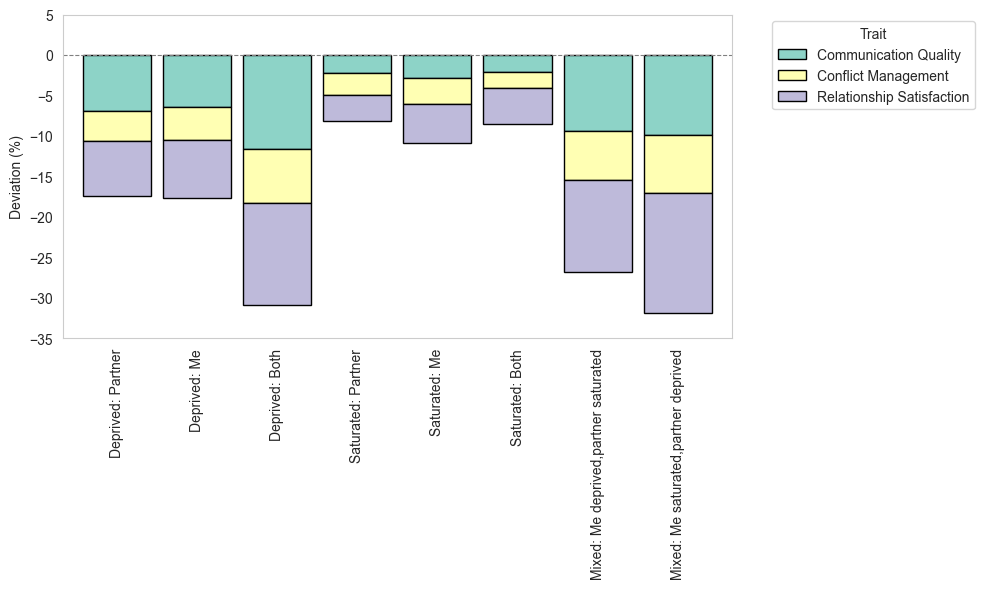

In [94]:
traits = [
    "Relationship Satisfaction",
    "Communication Quality",
    "Conflict Management",
]

all_means = []

for trait in traits:
    df_couple = df.melt(
        id_vars=["Group1"],
        value_vars=[trait],  # <- must be a list
        var_name="Trait",
        value_name="Score"
    )
    mean_baseline = (
        df_couple.loc[df_couple["Group1"] == "SubGroup1", "Score"].mean()
    )
    df_plot = (
        df_couple
        .assign(
            Deviation=lambda x: x["Score"] - mean_baseline,
            Deviation_pct=lambda x: ((x["Score"] - mean_baseline) / mean_baseline) * 100
        )
        .query("Group1 != 'SubGroup1'")
    )
    means = (
        df_plot.groupby("Group1", observed=True)["Deviation_pct"]
        .mean()
        .round(2)
        .reset_index()
    )

    means["Trait"] = trait  # keep which trait it came from
    all_means.append(means)

df_means_all = pd.concat(all_means, ignore_index=True)

df_stacked = df_means_all.pivot(index="Group1", columns="Trait", values="Deviation_pct")
group_order = ["SubGroup7", "SubGroup2", "SubGroup3",
               "SubGroup8", "SubGroup5", "SubGroup6",
               "SubGroup4", "SubGroup9"]

group_labels = [
    'Deprived: Partner', 'Deprived: Me', 'Deprived: Both',
    'Saturated: Partner', 'Saturated: Me', 'Saturated: Both',
    'Mixed: Me deprived,partner saturated', 'Mixed: Me saturated,partner deprived',
]

df_stacked = df_stacked.loc[group_order]
df_stacked.index = group_labels

colors = sns.color_palette("Set3", len(traits))

ax = df_stacked.plot(
    kind="bar",
    stacked=True,
    color=colors,
    figsize=(10, 6),
    edgecolor="black",
    width=0.85
)

ax.axhline(0, color="grey", linestyle="--", linewidth=0.8)
ax.set_ylabel("Deviation (%)")
ax.set_xlabel("")

ax.legend(title="Trait", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(-35, 5)
plt.tight_layout()
plt.grid(False)
plt.savefig(f'output/img_bg/alles/Communication_stacked.png', dpi=600, transparent=False, bbox_inches='tight')